In [50]:
# calculate annual total fossil fuel emission for 
# ODIAC and EDGAR5
# and compare

In [51]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [52]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import regionmask
from util.functions import area_latlon
from util.gamap_colormap import WhGrYlRd

In [53]:
first_yr = 1990
last_yr  = 2018
eu28_names = ['United Kingdom', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
eu28_tmp = np.zeros(len(eu28_names))
eu28_tmp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
# EDGAR
input_dir = '/exports/csce/datastore/geos/users/msadiq/'
year_vec = np.arange(first_yr, last_yr+1,1)#[2016,2017,2018]
lat_res = 0.1
lon_res = 0.1
varname = 'emi_co2'
fname1 = 'EDGARv5/v50_CO2_excl_short-cycle_org_C_'
fname2 = '.0.1x0.1.nc'
sum_edgar_global = np.zeros(len(year_vec))
sum_edgar_eu28 = np.zeros(len(year_vec))

In [55]:
tmp = xr.open_dataset(input_dir+'EDGARv5/v50_CO2_excl_short-cycle_org_C_2016.0.1x0.1.nc')
dr = tmp['emi_co2']       #.attrs#['global_total'] #['intl_bunker'][:,:,1].plot()
mask = regionmask.defined_regions.natural_earth.countries_110.mask(dr)

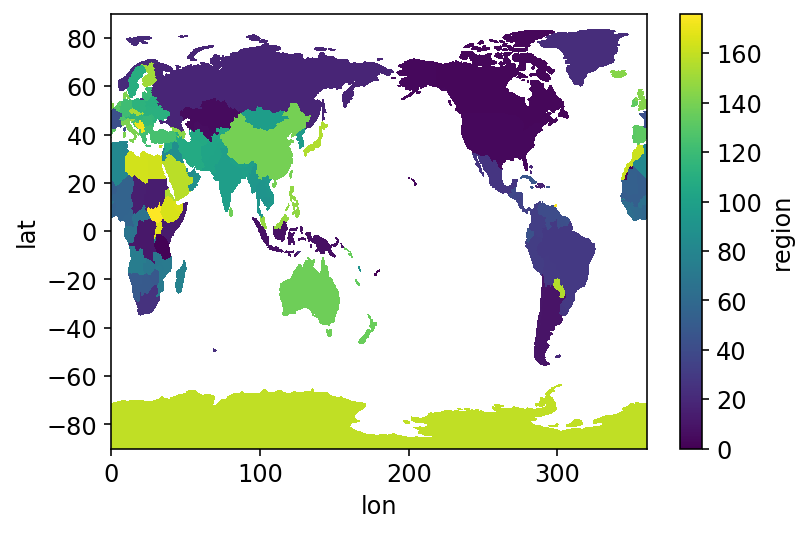

In [56]:
mask.plot()
mean_countries = dr.groupby(mask).mean('stacked_lat_lon')
names = regionmask.defined_regions.natural_earth.countries_110[mean_countries.region.values].names
mean_countries.coords['names'] = ('region', names)

In [57]:
mean_countries.names.values

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "CÃ´te d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', '

In [58]:
for i, iyear in enumerate(year_vec):
    ds_EDGAR = xr.open_dataset(input_dir + 
                               fname1 +
                               str(iyear) + 
                               fname2)
    data = ds_EDGAR[varname].copy()
    
    for ilat, lat in enumerate(data.lat):
        area_tmp = area_latlon(lat1 = lat, 
                               lon1 = data.lon[10].values, 
                               lat2 = lat + lat_res, 
                               lon2 = data.lon[10].values + lon_res)
        if(iyear == 2016):
            data[ilat,:] = data[ilat,:] * area_tmp *3600*24*366*1e6 # unit: kgCO2/yr
        else:
            data[ilat,:] = data[ilat,:] * area_tmp *3600*24*365*1e6 # unit: kgCO2/yr
    annual_edgar = data.copy()
    total_edgar = data.sum()   # kgCO2/year, same as data description
    ann_total = total_edgar.values*1e-12        # GtCO2/yr
    ann_total_C = total_edgar.values*1e-12*12/44  # GtC/yr
    
    sum_countries = annual_edgar.groupby(mask).sum('stacked_lat_lon')
    sum_countries.coords['names'] = ('region', names)
    
    eu28_tmp = np.zeros(len(eu28_names))
    for count, name in enumerate(eu28_names):
        #print(sum_countries.isel(region=(sum_countries.names == eu28_names[count])))
        eu28_tmp[count] = sum_countries.isel(region=(sum_countries.names == eu28_names[count]))
    
    sum_edgar_eu28[i] = sum(eu28_tmp)*1e-12 # GtCO2/yr
    
    print(str(iyear))
    print('EU28 annual emission: ' + str(sum_edgar_eu28[i]))
    
    #print('annual total from EDGAR team:')
    #print(data.attrs['total_emi_co2'])
    #print('annual total from this calculation:')
    #print(' ',ann_total)
    #print(' ')
    #print('total ffCO2 emission (GtC/yr)  : ', ann_total_C)
    
    output_edgar[i] = ann_total

1990
EU28 annual emission: 4.309843280128
1991
EU28 annual emission: 4.2588433264639995
1992
EU28 annual emission: 4.096181457408
1993
EU28 annual emission: 4.026770161152
1994
EU28 annual emission: 4.007972875776
1995
EU28 annual emission: 4.052490051072
1996
EU28 annual emission: 4.151868289024
1997
EU28 annual emission: 4.078482040832
1998
EU28 annual emission: 4.072385868288
1999
EU28 annual emission: 4.008809642496
2000
EU28 annual emission: 4.022251607552
2001
EU28 annual emission: 4.091282388992
2002
EU28 annual emission: 4.069522137088
2003
EU28 annual emission: 4.175806939648
2004
EU28 annual emission: 4.178545984
2005
EU28 annual emission: 4.173153346048
2006
EU28 annual emission: 4.192225821184
2007
EU28 annual emission: 4.13621036544
2008
EU28 annual emission: 4.044323689984
2009
EU28 annual emission: 3.74021698048
2010
EU28 annual emission: 3.8739405747199998
2011
EU28 annual emission: 3.7340073973759997
2012
EU28 annual emission: 3.691461224448
2013
EU28 annual emission: 

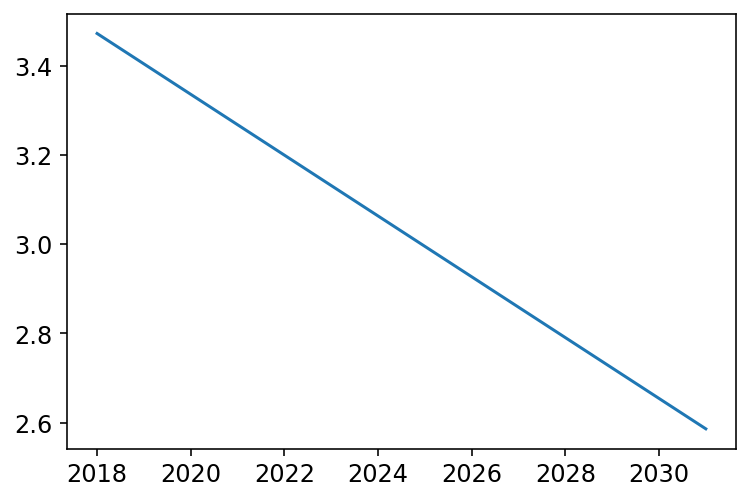

In [97]:
after_year_vector = [2018,2031]
after_2018 = np.empty(len(after_year_vector))
after_2018[0] = sum_edgar_eu28[-1]
after_2018[1] = sum_edgar_eu28[0]*0.6
plt.plot(after_year_vector, after_2018)

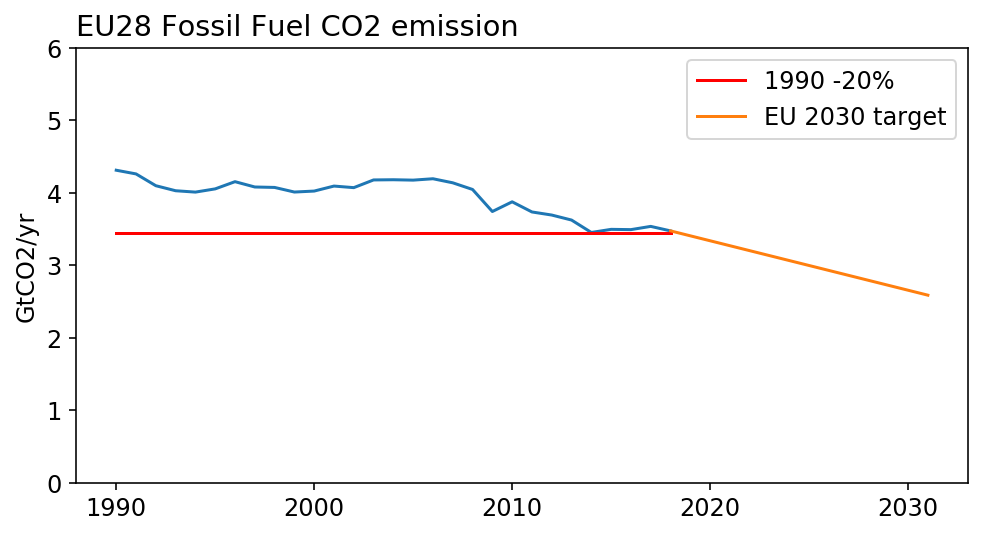

In [105]:
#plt.plot(year_vec, output_edgar)
fig = plt.figure(figsize=[8, 4])
plt.plot(year_vec, sum_edgar_eu28)

plt.title('EU28 Fossil Fuel CO2 emission', loc='left')
plt.plot(year_vec, np.repeat(sum_edgar_eu28[0]*0.8,len(sum_edgar_eu28)), 'r', label = '1990 -20%')
#plt.plot(year_vec, np.repeat(sum_edgar_eu28[0]*0.6,len(sum_edgar_eu28)), 'r', label = '1990 -40%')
plt.plot(after_year_vector, after_2018, label = 'EU 2030 target')
plt.ylim(0,6)
plt.ylabel('GtCO2/yr')
plt.legend()

#fig.tight_layout()
fig.savefig('/geos/u73/msadiq/co2_data/extract/plots/eu2020_2030.png', dpi=300)

In [13]:
# ODIAC
input_dir = '/exports/csce/datastore/geos/users/msadiq/'
year_vec = np.arange(2000,2019,1)
lat_res = 1.
lon_res = 1.
varname1 = 'land'
varname2 = 'intl_bunker'
fname1 = 'odiac/odiac2019_1x1d_'
fname2 = '.nc'
output_odiac = np.zeros(len(year_vec))

In [14]:
tmp = xr.open_dataset(input_dir+'odiac/odiac2019_1x1d_2016.nc')
tmp#['land'] #.attrs#['global_total'] #['intl_bunker'][:,:,1].plot()

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, month: 12)
Coordinates:
  * lon          (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month        (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    land         (month, lat, lon) float32 ...
    intl_bunker  (month, lat, lon) float32 ...
Attributes:
    global_total:  9817 million metric tons of carbon per year (sum of 12 mon...
    notes:         This file contains the year 2019 version of ODIAC ffco2 em...
    citation:      Oda and Maksyutov (2011) ACP; Oda et al (2018) ESSD
    email:         tom.oda@nasa.gov
    url:           www.odiac.org/
    institution:   USRA/NASA/CDIAC/AppState/NIES/NOAA
    version:       ODIAC2017 FFCO2 emisssion dataset
    source:        Generated by ODIAC ffco2 emission model version 3.0
    history:       Created by Tom Oda on Tue Nov 26 2019 14:02:07 EST

In [15]:
for i,iyear in enumerate(year_vec):
    ds_data = xr.open_dataset(input_dir + 
                               fname1 +
                               str(iyear) + 
                               fname2)
    data = ds_data[varname1] + ds_data[varname2]
    
    if(iyear == 2016):
        days_in_month = [31,29,31,30,31,30,31,31,30,31,30,31]
    else:
        days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]

    for ilat, lat in enumerate(data.lat):
        for imonth in range(12):
            area_tmp = area_latlon(lat1 = lat, 
                                   lon1 = data.lon[10].values, 
                                   lat2 = lat + lat_res, 
                                   lon2 = data.lon[10].values + lon_res)
            data[imonth, ilat,:] = data[imonth, ilat,:] * area_tmp * days_in_month[imonth] *1e-3 # unit: kgCO2/month
    annual = data.copy()
    total = data.sum()             # kgCO2/year, same as data description
    ann_total = total.values*1e-6 # GtCO2/yr
    
    print(str(iyear))
    print('annual total from ODIAC team:')
    print(ds_data.attrs['global_total'])
    print('annual total from this calculation:')
    print(ann_total*1000)
    print('calculation+0.5%')
    print(ann_total*1000*1.005)
    print(' ')
    output_odiac[i] = ann_total

2000
annual total from ODIAC team:
6800 million metric tons of carbon per year (sum of 12 months)
annual total from this calculation:
6735.901
calculation+0.5%
6769.580504999999
 
2001
annual total from ODIAC team:
6841 million metric tons of carbon per year (sum of 12 months)
annual total from this calculation:
6795.9255
calculation+0.5%
6829.905127499999
 
2002
annual total from ODIAC team:
7007 million metric tons of carbon per year (sum of 12 months)
annual total from this calculation:
6961.125
calculation+0.5%
6995.930624999999
 
2003
annual total from ODIAC team:
7394 million metric tons of carbon per year (sum of 12 months)
annual total from this calculation:
7345.674
calculation+0.5%
7382.402369999999
 
2004
annual total from ODIAC team:
7733 million metric tons of carbon per year (sum of 12 months)
annual total from this calculation:
7660.987999999999
calculation+0.5%
7699.292939999998
 
2005
annual total from ODIAC team:
8047 million metric tons of carbon per year (sum of 12 

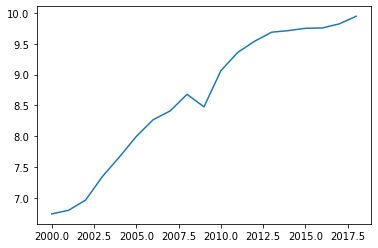

In [18]:
plt.plot(year_vec, output_odiac)

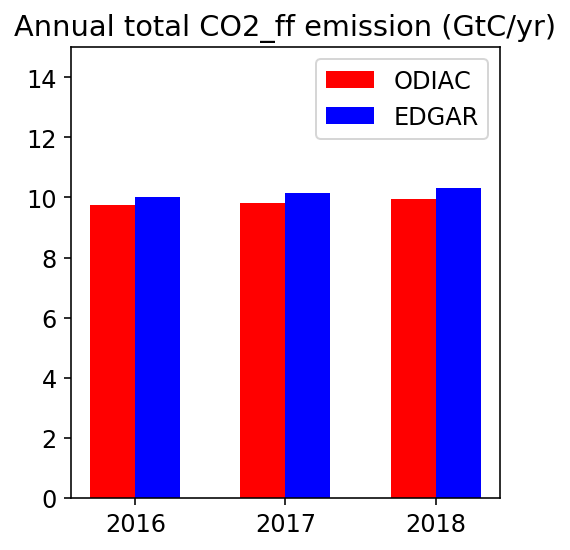

In [35]:
bar_pos = np.arange(len(year_vec)) + 1 # position of the bars

fig = plt.figure(figsize=[4, 4])
width = 0.3

bars_ODIAC = plt.bar(bar_pos-0.15, output_odiac, width=width, color = 'r', label='ODIAC')
bars_EDGAR = plt.bar(bar_pos+0.15, output_edgar, width=width, color = 'b', label='EDGAR')

plt.xticks(bar_pos, year_vec)
plt.ylim(top = 15)
plt.title('Annual total CO2_ff emission (GtC/yr)', loc='center')
plt.legend()

fig.tight_layout()

fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/annual_total.png', dpi=300)

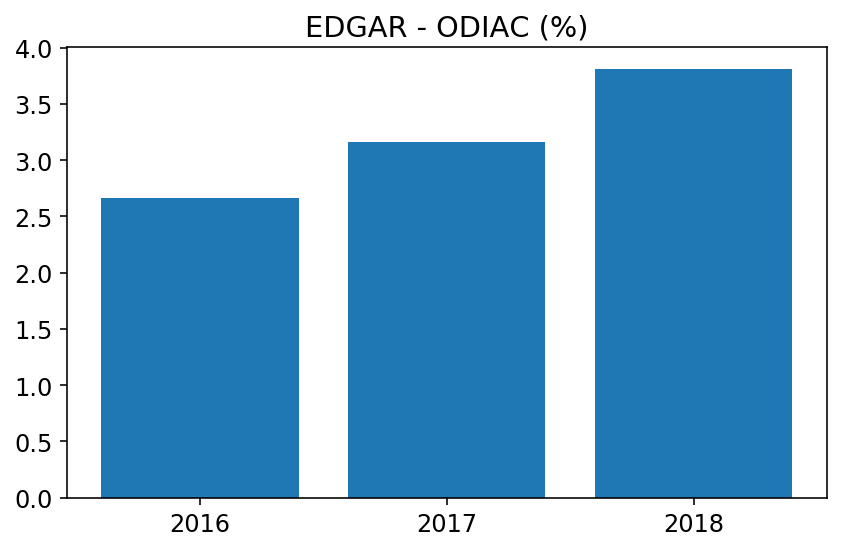

In [30]:
fig = plt.figure(figsize=[6, 4])
x = range(3)

plt.bar(x, 100*(output_edgar-output_odiac)/output_odiac, label = 'EDGAR-ODIAC')
plt.xticks(x, year_vec)

plt.title('EDGAR - ODIAC (%)')

fig.tight_layout()